In [4]:
from statsmodels.tsa.stattools import adfuller, kpss
import pandas as pd
from models.scripts.utils import load_csv, split_date

In [5]:
file_path = 'data/btc_timeseries.csv'

df = load_csv(file_path)

In [6]:
df.head(10)

,timestamp,time,open,close,high,low,volume,volume_24h,market_cap,circulating_supply,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,social_contributors,social_volume,social_volume_global,social_dominance,market_cap_global,market_dominance
0,1567036800,2019-08-29,9699.30,9492.81,9709.59,9344.69,414776885.0,2.119802e+10,1.704075e+11,18461987.0,...,629.0,2.0,1.0,1.0,936.0,36275,7988.0,41.199299,2.332637e+11,66.321895
1,1567123200,2019-08-30,9453.74,9587.25,9699.85,9368.27,414776885.0,2.119802e+10,1.721211e+11,18461987.0,...,629.0,2.0,1.0,1.0,936.0,34181,7988.0,41.199299,2.332637e+11,66.321895
2,1567209600,2019-08-31,9603.96,9624.54,9714.11,9512.03,414776885.0,2.119802e+10,1.724485e+11,18461987.0,...,629.0,2.0,1.0,1.0,936.0,28833,7988.0,41.199299,2.332637e+11,66.321895
3,1567296000,2019-09-01,9646.58,9768.36,9823.53,9578.66,414776885.0,2.119802e+10,1.748100e+11,18461987.0,...,629.0,2.0,1.0,1.0,936.0,31799,7988.0,41.199299,2.332637e+11,66.321895
4,1567382400,2019-09-02,9783.44,10387.50,10459.00,9764.76,414776885.0,2.119802e+10,1.854709e+11,18461987.0,...,629.0,2.0,1.0,1.0,936.0,37664,7988.0,41.199299,2.332637e+11,66.321895
5,1567468800,2019-09-03,10406.81,10625.10,10773.27,10296.30,414776885.0,2.119802e+10,1.913334e+11,18461987.0,...,629.0,2.0,1.0,1.0,936.0,41802,7988.0,41.199299,2.332637e+11,66.321895
6,1567555200,2019-09-04,10589.31,10585.20,10827.14,10392.88,414776885.0,2.119802e+10,1.904446e+11,18461987.0,...,629.0,2.0,1.0,1.0,936.0,36887,7988.0,41.199299,2.332637e+11,66.321895
7,1567641600,2019-09-05,10534.67,10556.16,10659.60,10475.88,414776885.0,2.119802e+10,1.897202e+11,18461987.0,...,629.0,2.0,1.0,1.0,936.0,36807,7988.0,41.199299,2.332637e+11,66.321895
8,1567728000,2019-09-06,10564.49,10309.91,10938.39,10228.17,414776885.0,2.119802e+10,1.857522e+11,18461987.0,...,629.0,2.0,1.0,1.0,936.0,39724,7988.0,41.199299,2.332637e+11,66.321895
9,1567814400,2019-09-07,10340.02,10491.96,10574.99,10331.88,414776885.0,2.119802e+10,1.883789e+11,18461987.0,...,629.0,2.0,1.0,1.0,936.0,30248,7988.0,41.199299,2.332637e+11,66.321895


### Visual Stationarity

In [7]:
half = int(len(df) / 2)
first_half = df['close'].iloc[:half]
second_half = df['close'].iloc[half:]

# Calculate rolling statistics
window_size = 12 
first_half_rolling_mean = first_half.rolling(window=window_size).mean()
first_half_rolling_std = first_half.rolling(window=window_size).std()

second_half_rolling_mean = second_half.rolling(window=window_size).mean()
second_half_rolling_std = second_half.rolling(window=window_size).std()

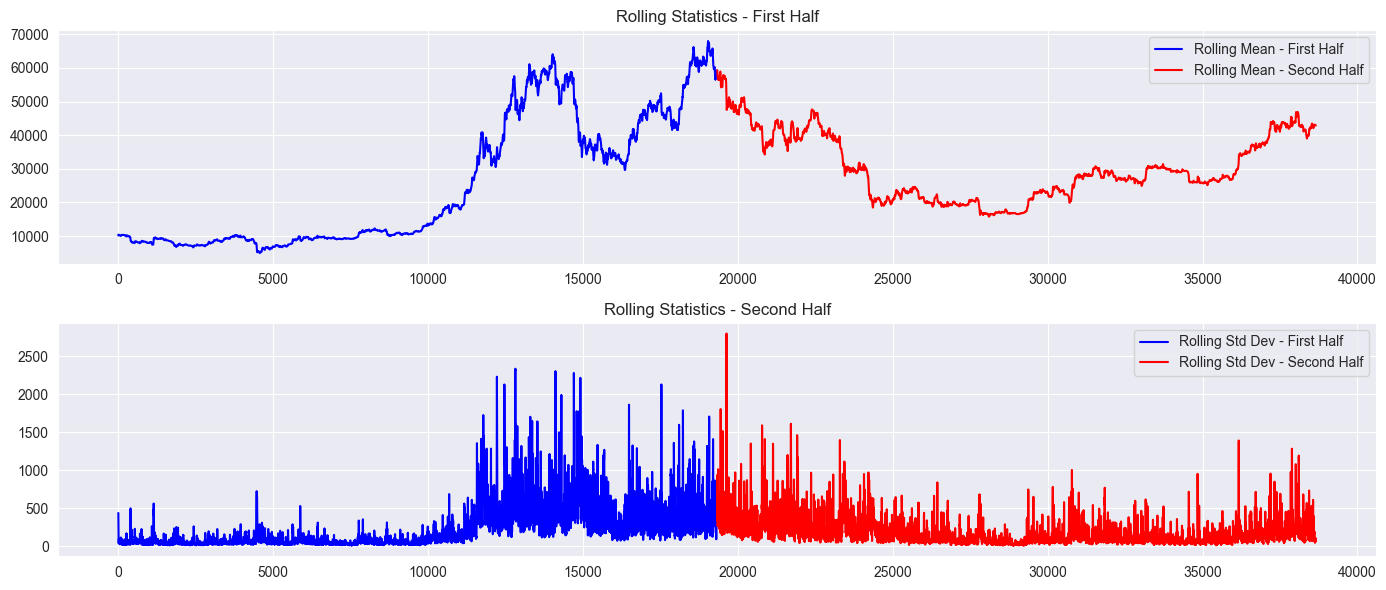

In [8]:
import matplotlib.pyplot as plt

# Plot Rolling Statistics for the First Half
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(first_half_rolling_mean, label='Rolling Mean - First Half', color='blue')
plt.plot(second_half_rolling_mean, label='Rolling Mean - Second Half', color='red')
plt.title('Rolling Statistics - First Half')
plt.legend()

# Plot Rolling Statistics for the Second Half
plt.subplot(2, 1, 2)
plt.plot(first_half_rolling_std, label='Rolling Std Dev - First Half', color='blue')
plt.plot(second_half_rolling_std, label='Rolling Std Dev - Second Half', color='red')
plt.title('Rolling Statistics - Second Half')
plt.legend()

plt.tight_layout()
plt.show()

### Statistical Stationarity

In [9]:
close_prices = df['close']
close_prices

0         9492.810000
1         9587.250000
2         9624.540000
3         9768.360000
4        10387.500000
             ...     
38651    42934.174517
38652    42897.020552
38653    42884.907415
38654    42754.413033
38655    42692.306213
Name: close, Length: 38656, dtype: float64

In [10]:
result = adfuller(close_prices.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.423434
p-value: 0.570992
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [11]:
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'Num Lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(close_prices)

KPSS Statistic: 8.084538649061786
p-value: 0.01
Num Lags: 116
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


/var/folders/4x/xdz4xz_d7c59926x0c2wps4m0000gn/T/ipykernel_43100/3698218819.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


In [12]:
df["close_diff"] = df["close"].diff()

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Fit a linear model
X = np.arange(len(df)).reshape(-1, 1)
y = df["close"].values
model = LinearRegression()
model.fit(X, y)

# Calculate the trend
trend = model.predict(X)

# Detrend the series
df["close_detrend"] = y - trend

In [14]:
df["close_log"] = np.log(df["close"])

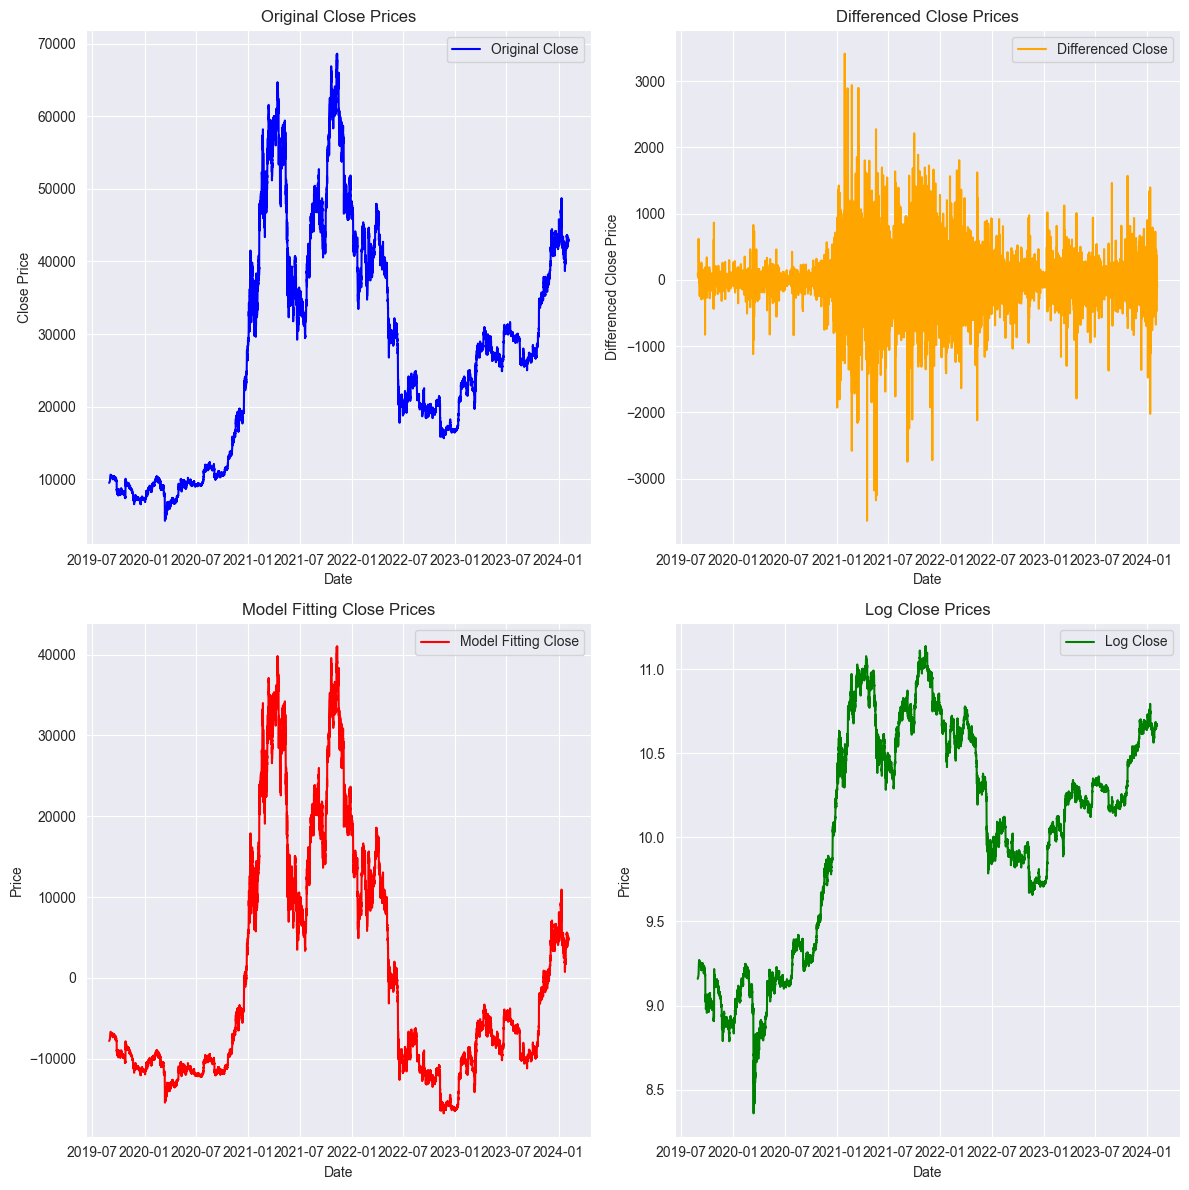

In [15]:
import matplotlib.pyplot as plt

# Plot the original 'Close' prices
plt.figure(figsize=(12, 12))  # Adjusted for larger size
plt.subplot(2, 2, 1)  # Two rows, two columns, first plot
plt.plot(df['time'], df['close'], label='Original Close', color='blue')
plt.title('Original Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Plot the differenced 'Close' prices
plt.subplot(2, 2, 2)  # Two rows, two columns, second plot
plt.plot(df['time'], df['close_diff'], label='Differenced Close', color='orange')
plt.title('Differenced Close Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.legend()

# Plot the 'Model Fitting Close' prices (assuming this column exists in df)
plt.subplot(2, 2, 3)  # Two rows, two columns, third plot
plt.plot(df['time'], df['close_detrend'], label='Model Fitting Close', color='red')
plt.title('Model Fitting Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot the 'Log Close' prices (assuming this column exists in df)
plt.subplot(2, 2, 4)  # Two rows, two columns, fourth plot
plt.plot(df['time'], df['close_log'], label='Log Close', color='green')
plt.title('Log Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()  # Adjusts the plots to fit visually better
plt.show()

In [16]:
def ADF_check(column):
    close_prices = df[column]
    result = adfuller(close_prices.dropna())  # Drop NA values if present
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [17]:
df['close_diff'].dropna(inplace=True)
ADF_check('close_diff')

ADF Statistic: -27.777032
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [18]:
ADF_check('close_log')

ADF Statistic: -1.196466
p-value: 0.675114
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [19]:
ADF_check('close_detrend')

ADF Statistic: -1.500177
p-value: 0.533424
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
